# ディープラーニングの学習メカニズム

## 学習とはパラメータ(バイアスや重み)の推定である

### データの収集

In [1]:
import torch

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

### データの可視化

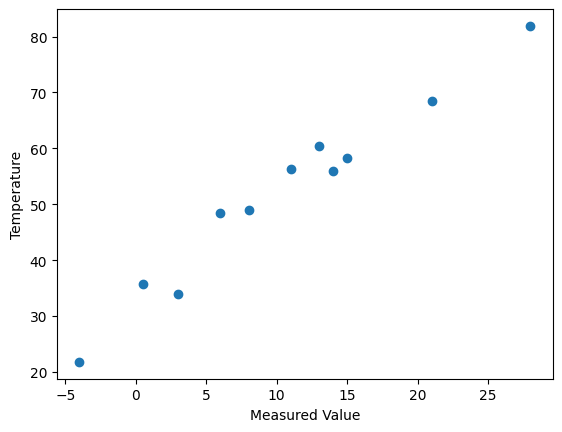

In [2]:
import matplotlib.pyplot as plt

plt.scatter(t_c, t_u)
plt.xlabel('Measured Value')
plt.ylabel('Temperature')
plt.show()

## 損失関数
* モデルの予測がどれだけ実際のデータから逸脱しているかを定量化する関数
* 最小値は0
* 訓練データから修正すべきパラメータの優先順位を決める

### 凸関数
損失関数の一種。カーブ上の任意の二点間の線分が関数のグラフ上に常にある関数

#### 凸関数をグラフで表したもの


![凸関数をグラフで表したもの](./output.png)

### 線形モデルにおいて、モデルを評価する際に絶対値誤差より二乗誤差がよく使われる理由


1. 計算が簡単:

二乗誤差は計算が簡単です。数字を二乗するだけで、特に大きな誤差があるときに大きく重視されます。一方、絶対値を計算するのは少し面倒です。

2. 外れ値に厳しい:

二乗誤差は、外れ値（予測がかなり間違っているデータ点）に対して非常に厳しいペナルティを課します。これは、大きな間違いを重く見るためです。

3. 数学的な都合:

数学的には、二乗誤差の方が扱いやすいです。特に、最適化（モデルを良くすること）の際に、微分（変化の割合を計算すること）が簡単にできます。絶対値誤差は、特定の点で微分が難しいです。

4. 統計的な理由:

統計的には、二乗誤差はデータが普通に分布している（正規分布と呼ばれる）場合に良い結果を与えます。

### PyTorchでの損失関数の扱い方
**ここでは1変数関数(線形回帰モデル)を使用**

In [3]:
def model(t_u, w, b):
    return t_u * w + b

In [4]:
def loss_fn(t_p, t_c):
    '''
    平均二乗誤差
    '''
    squared_diffs = (t_p - t_c) **2
    return squared_diffs.mean()

In [7]:
# 予測
w = torch.ones(())
b = torch.zeros(())
print(w, b)

t_p = model(t_u, w, b)
# print(t_p)

# 損失の計算
loss = loss_fn(t_p, t_c)
print(loss)

tensor(1.) tensor(0.)
tensor(1763.8848)


## 勾配降下法
与えられた関数（例えば、損失関数やコスト関数）の最小値を見つける。損失が最小になるwとbを求める

## それぞれのパラメータにおける損失関数の変化率の計算(簡易版)
* 下の方法を繰り返し最小値を求めていく
* 複数のパラメータを持つモデルでは機能しない(片方の係数をを固定して微分係数を計算するため)

### 中心差分近似を使って重みの微分係数の計算
w に対する損失関数の変化率（微分係数）の近似値

In [14]:
delta = 0.1
plus_change = loss_fn(model(t_u, w + delta, b), t_c) # w の現在の値に小さな変化量 delta を加えたときのモデルの損失
minus_change = loss_fn(model(t_u, w - delta, b), t_c) # w の現在の値に小さな変化量 delta を減じたときのモデルの損失

loss_rate_of_change_w = (plus_change - minus_change) / (2.0 * delta) # w に関する損失関数の勾配の近似値(wで偏微分する)

# 学習率0.01
learning_rate = 1e-2
# パラメータの更新
w = w - learning_rate * loss_rate_of_change_w

print(plus_change)
print(minus_change)
print(loss_rate_of_change_w)
print(w) 

tensor(2245.0225)
tensor(1341.5630)
tensor(4517.2974)
tensor(-44.1730)


### 中心差分近似を使ってバイアスの微分係数の計算
b に対する損失関数の変化率（微分係数）の近似値

In [8]:
delta = 0.1
plus_change = loss_fn(model(t_u, w, b + delta), t_c)
minus_change = loss_fn(model(t_u, w, b - delta), t_c)

loss_rate_of_change_b = (plus_change - minus_change) / (2.0 * delta)

#学習率0.01
learning_rate = 1e-2
# パラメータの更新
b = b - learning_rate * loss_rate_of_change_b

print(plus_change)
print(minus_change)
print(loss_rate_of_change_b)
print(b)

tensor(1772.1547)
tensor(1755.6348)
tensor(82.5995)
tensor(-0.8260)


## 勾配降下法の解析的手法
モデルに2つ以上のパラメータがある場合、各パラメータに対する損失の個々の導関数（偏微分）を計算する

### 損失関数(平均二乗誤差: dx**2 / dx)の導関数
* 損失関数の変化率
* MSEの導関数は、損失関数がモデルのパラメータ（例えば、重みやバイアス）に対してどのように変化するかを示します
* 戻り値: 平均二乗誤差の平均
**dloss_fnの戻り値にwやbで偏微分することで勾配を計算できるようになる**   

* 偏微分する関数は平均二乗法(損失関数)
1. res = dloss_fn(t_p, t_c)
2. 重みの偏微分: dloss_dw = res * w
3. バイアスの偏微分: dloss_db = res * b
4. 勾配: [dloss_dw, dloss_db]


In [29]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0) # 除算は平均のため
    return dsq_diffs

### 導関数をモデルへ適応

In [6]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

### 勾配関数の定義

In [24]:
def grad_fn(t_u, t_c, t_p, w, b):
    '''
    損失関数の勾配を求める
    '''
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b) # wで偏微分
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b) # bで偏微分
    return torch.stack([dloss_dw.sum(), dloss_db.sum()]) # 勾配

### モデルに適合させるための反復処理

In [47]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):

        w, b = params

        t_p = model(t_u, w, b)  # <1>
        # 予測値と実測値の平均二乗誤差を計算
        loss = loss_fn(t_p, t_c)
        # 勾配を取得
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>
        # パラメータを更新
        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>

    return params

### 過学習(学習率が高すぎた)

In [30]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
...
Epoch 10, Loss 90901105189019073810297959556841472.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

### 学習率を修正

In [31]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

### 正規化
* パラメータごとに適切な学習率が異なる問題を解決する
* ここでは入力値を小さくして勾配が極端に変化するのを防ぐ

In [37]:
t_un = 0.1 * t_u

In [39]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

### 学習回数を5000回にしてみる

In [57]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params=False)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...
Epoch 4000, Loss 2.927680
Epoch 5000, Loss 2.927648


## 再度可視化を行う

tensor([ 1.8593, 12.7008, 13.9352, 26.6552, 12.9155,  8.9439,  0.8932, -5.6009,
         8.6755, 15.1160, 19.4097])
tensor([ 1.8593, 12.7008, 13.9352, 26.6552, 12.9155,  8.9439,  0.8932, -5.6009,
         8.6755, 15.1160, 19.4097])


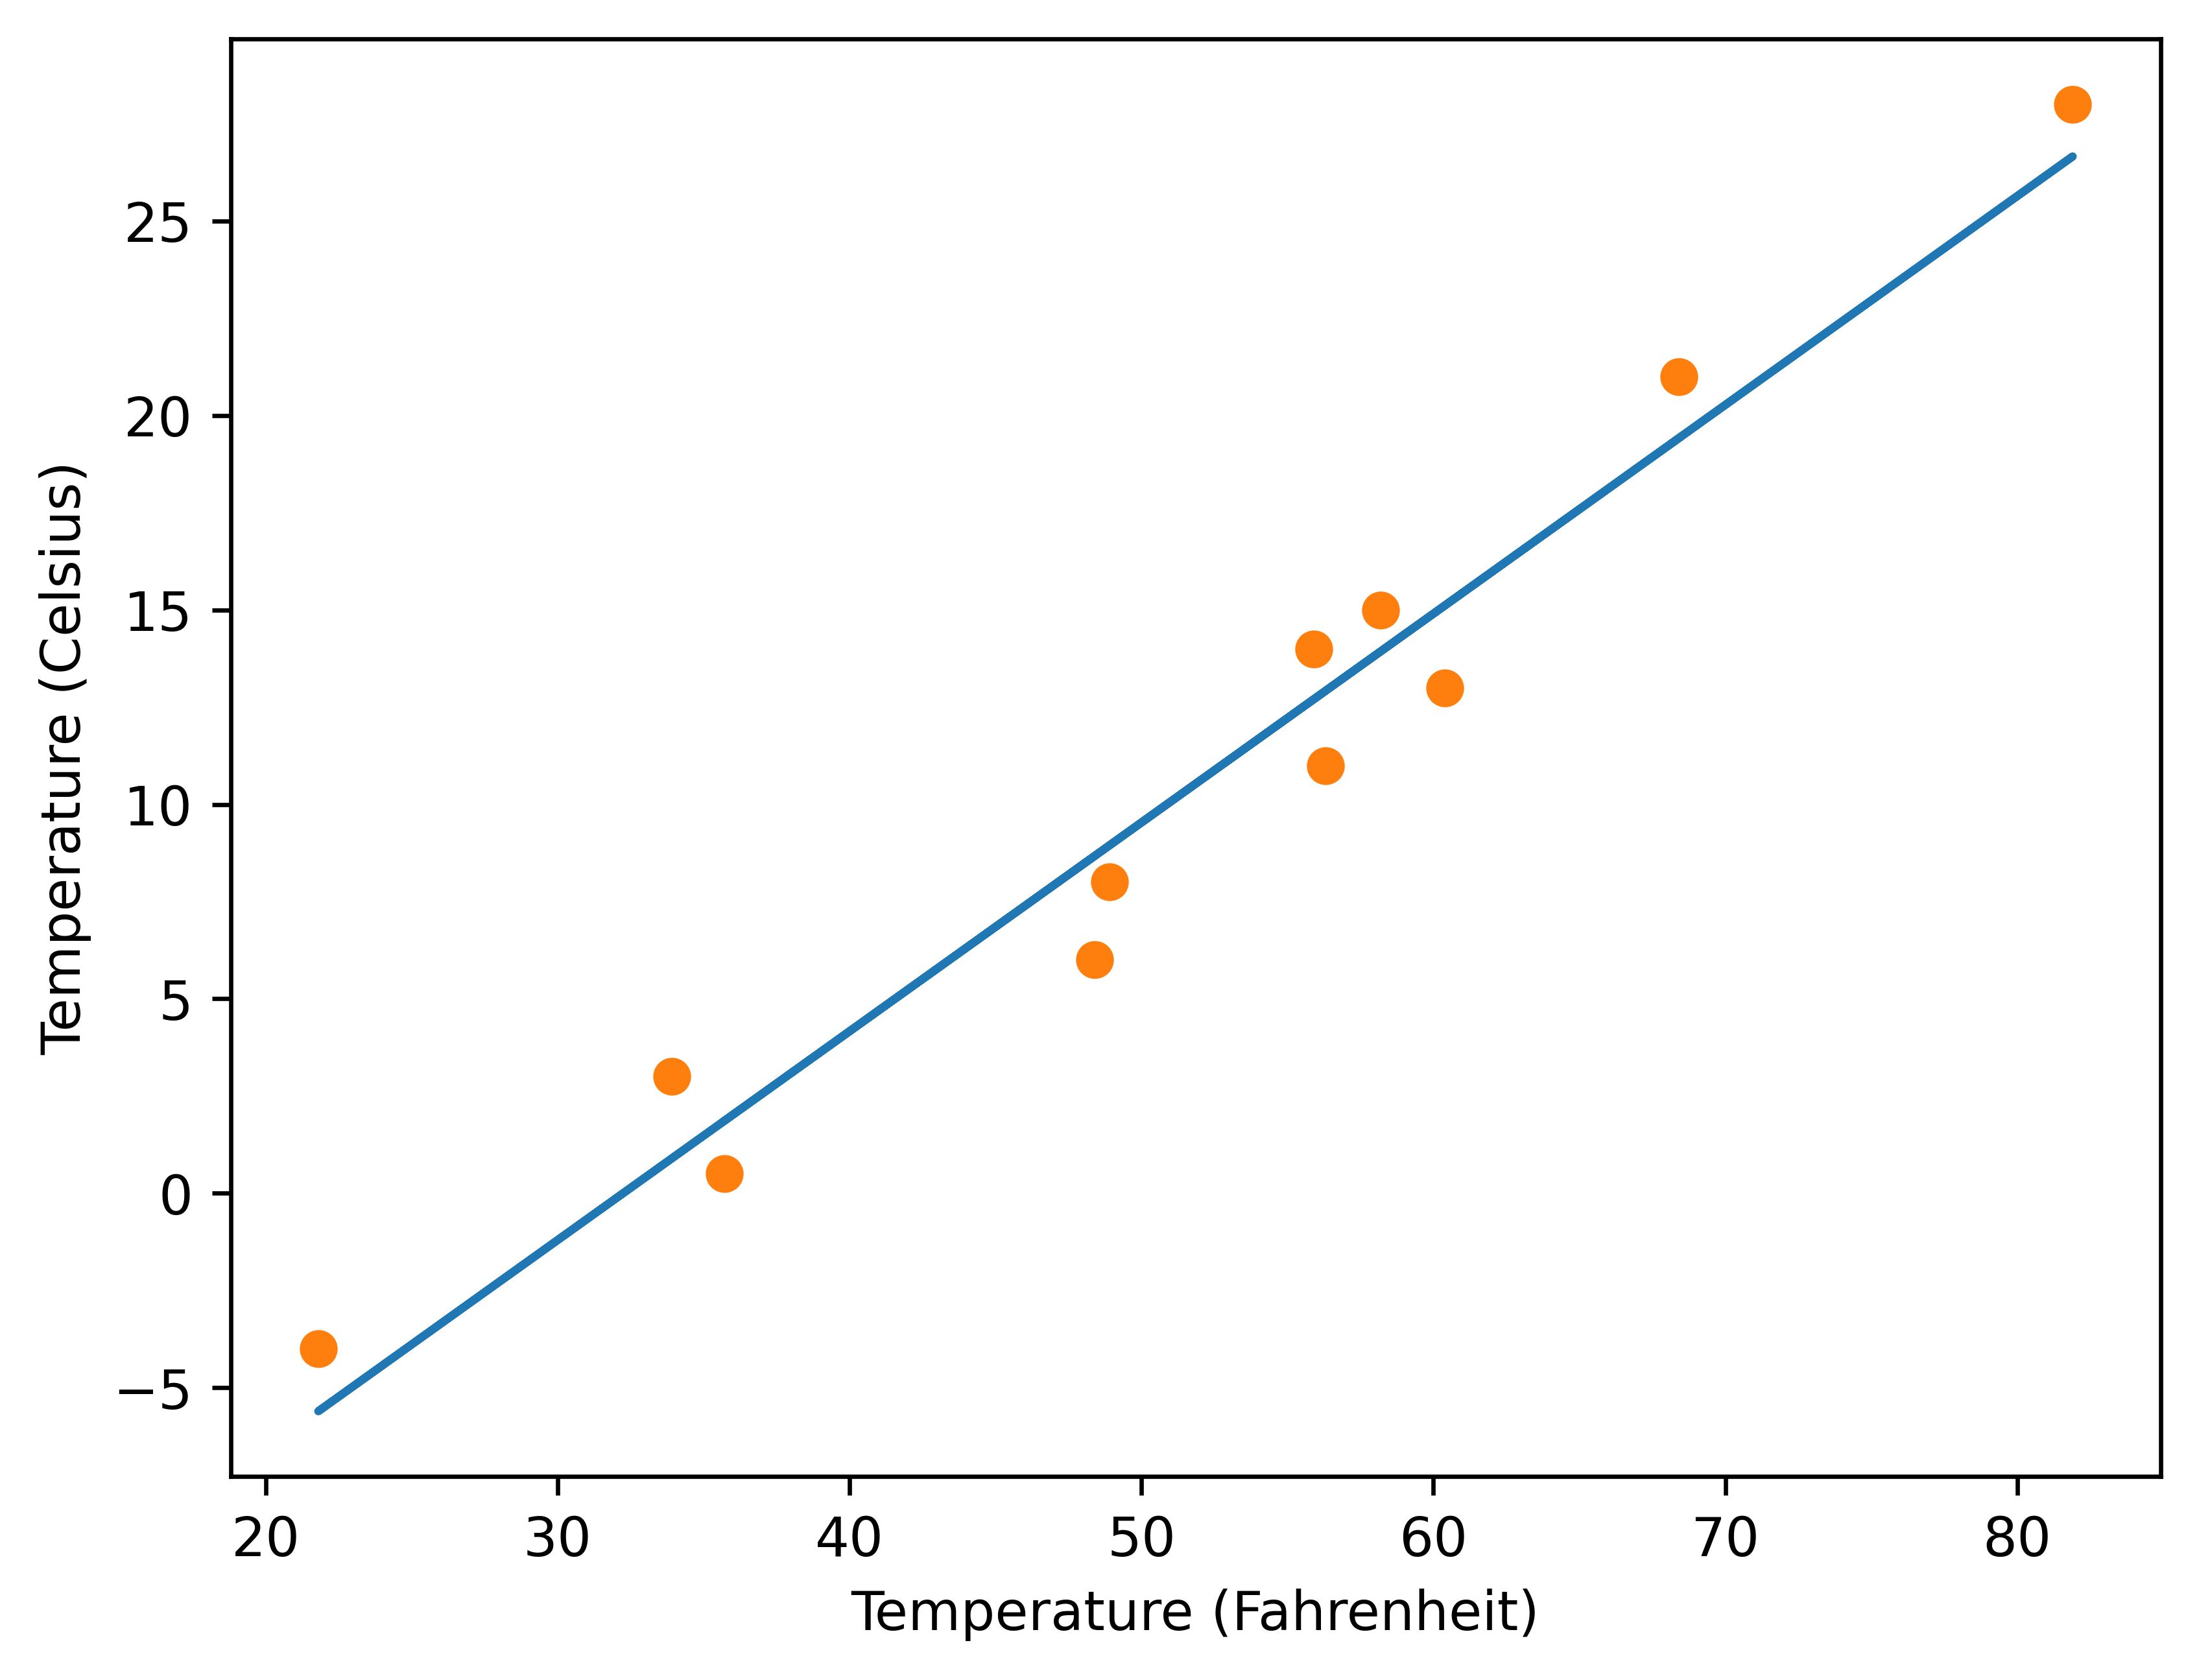

In [61]:
import matplotlib.pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')